In [252]:
import pandas as pd
import numpy as np
from math import exp
from scipy.optimize import curve_fit
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import matplotlib.pyplot as plt

### Define the function

In [253]:
def mono_exp(X, a, b):
    return a * np.exp(-(X/b))

In [254]:
def multi_exp(X, a, b, c, d):
    return (a * np.exp(-(X/b))) + (c * np.exp(-(X/d)))

In [255]:
df = pd.read_csv('Pressure1.csv', header=None)   #Do not forget to change the data! 
df.columns = ['tau', 'I']
df.head()

,tau,I
0,7.5,4.668953e+07
1,22.5,3.962107e+07
2,37.5,3.596703e+07
3,52.5,3.354784e+07
4,67.5,3.205289e+07


In [256]:
X = np.array(df.tau, dtype = 'float128')

In [257]:
y = np.array(df.I, dtype = 'float128')

In [258]:
popt, pcov = curve_fit(mono_exp, X[12:51], y[12:51], p0=(10000000, 350))

In [259]:
p1 = popt[0] # This is your a
p2 = popt[1] # This is your b

print(popt)

[3.31016853e+07 8.14067693e+02]


In [260]:
residuals = y[12:51] - mono_exp(X[12:51],p1,p2)
fres = sum( (residuals**2)/mono_exp(X[12:51],p1,p2))

8811413525.854378563


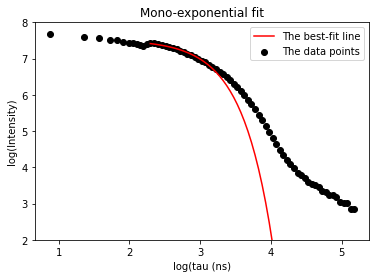

In [261]:
print(fres)

""" Now if you need to plot, perform the code below """
curvey = mono_exp(X[12:51],p1,p2) # This is your y axis fit-line

plt.plot(np.log10(X[12:51]), np.log10(curvey), 'red', label='The best-fit line')
plt.scatter(np.log10(X),np.log10(y), c='black',label='The data points')
plt.legend(loc='best')
plt.xlabel('log(tau (ns)')
plt.ylabel('log(Intensity)')
plt.title('Mono-exponential fit')
plt.ylim(2, 8)
plt.show()

## Multiexponential 

In [262]:
popt1, pcov1 = curve_fit(multi_exp, X[12:51], y[12:51], p0=(25000000, 400, 15000000, 1600))

In [263]:
pa = popt1[0] # This is your a
pb = popt1[1] # This is your b
pc = popt1[2] # This is your b
pd = popt1[3] # This is your b
print(popt1)

[2.52631885e+07 4.16507068e+02 1.30038625e+07 1.61479263e+03]


In [264]:
residuals1 = y[12:51] - multi_exp(X[12:51],pa,pb, pc, pd)
fres1 = sum( (residuals1**2)/multi_exp(X[12:51],pa,pb, pc, pd))

1692388.1462985872779


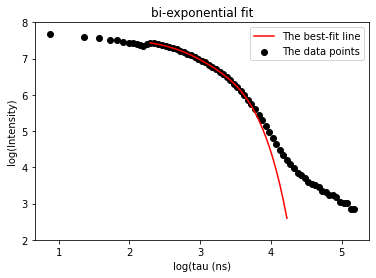

In [268]:
print(fres1)

""" Now if you need to plot, perform the code below """
curvey1 = multi_exp(X[12:51], pa, pb, pc, pd) # This is your y axis fit-line

plt.plot(np.log10(X[12:51]), np.log10(curvey1), 'red', label='The best-fit line')
plt.scatter(np.log10(X),np.log10(y), c='black',label='The data points')
plt.legend(loc='best')
plt.xlabel('log(tau (ns)')
plt.ylabel('log(Intensity)')
plt.title('bi-exponential fit')
plt.ylim(2, 8)
plt.show()